In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [8]:
police_outlines =gpd.read_file('../data/Police Precinct District Outlines (GIS).geojson')
print(police_outlines.crs)
police_outlines.head()

EPSG:4326


,precinct,shape_area,shape_len,geometry
0,CENTRAL,98541971.0257,46234.6717307,"MULTIPOLYGON (((-86.77525 36.14894, -86.77649 ..."
1,EAST,562260180.986,90261.1338967,"MULTIPOLYGON (((-86.74977 36.24057, -86.74955 ..."
2,HERMITAGE,2496337143.44,521944.947628,"MULTIPOLYGON (((-86.61306 36.24427, -86.61038 ..."
3,MADISON,1913402934.01,254564.86409,"MULTIPOLYGON (((-86.74955 36.24047, -86.74977 ..."
4,MIDTOWN-HILLS,1317030605.73,187104.273068,"MULTIPOLYGON (((-86.77935 36.14855, -86.77912 ..."


In [10]:
type(police_outlines)

geopandas.geodataframe.GeoDataFrame

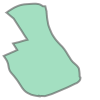

In [11]:
police_outlines.loc[0, 'geometry']

In [14]:
print(police_outlines.loc[0,'geometry'])

MULTIPOLYGON (((-86.77524596288148 36.14894455629901, -86.77649210602664 36.14857687665805, -86.7781616274096 36.14865043038547, -86.77838512892765 36.14857286655733, -86.77853379143811 36.14852125124118, -86.77861081108503 36.14856586200554, -86.7790816946907 36.14871825277781, -86.77913112137387 36.14872947083355, -86.7791311513073 36.14872914156234, -86.77911998681444 36.14850955613429, -86.77934500767239 36.14854906263405, -86.78023330815216 36.148672544497074, -86.78103534916679 36.148817484656085, -86.7819350783633 36.14901057418182, -86.78290019974413 36.14926707446858, -86.78403804736715 36.14981240036976, -86.78447965199213 36.15002333651708, -86.78457729772377 36.15008440121774, -86.78517567838756 36.150454222656585, -86.78554657230615 36.15072753371399, -86.7860612634401 36.151192999618175, -86.7860921940855 36.15122095575138, -86.78616548052857 36.151284512869175, -86.78623595571774 36.15137215215066, -86.78653778557329 36.151730245614985, -86.78712021975099 36.152467528934

<Axes: >

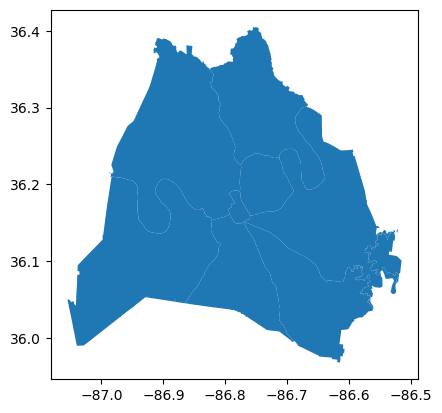

In [15]:
police_outlines.plot()

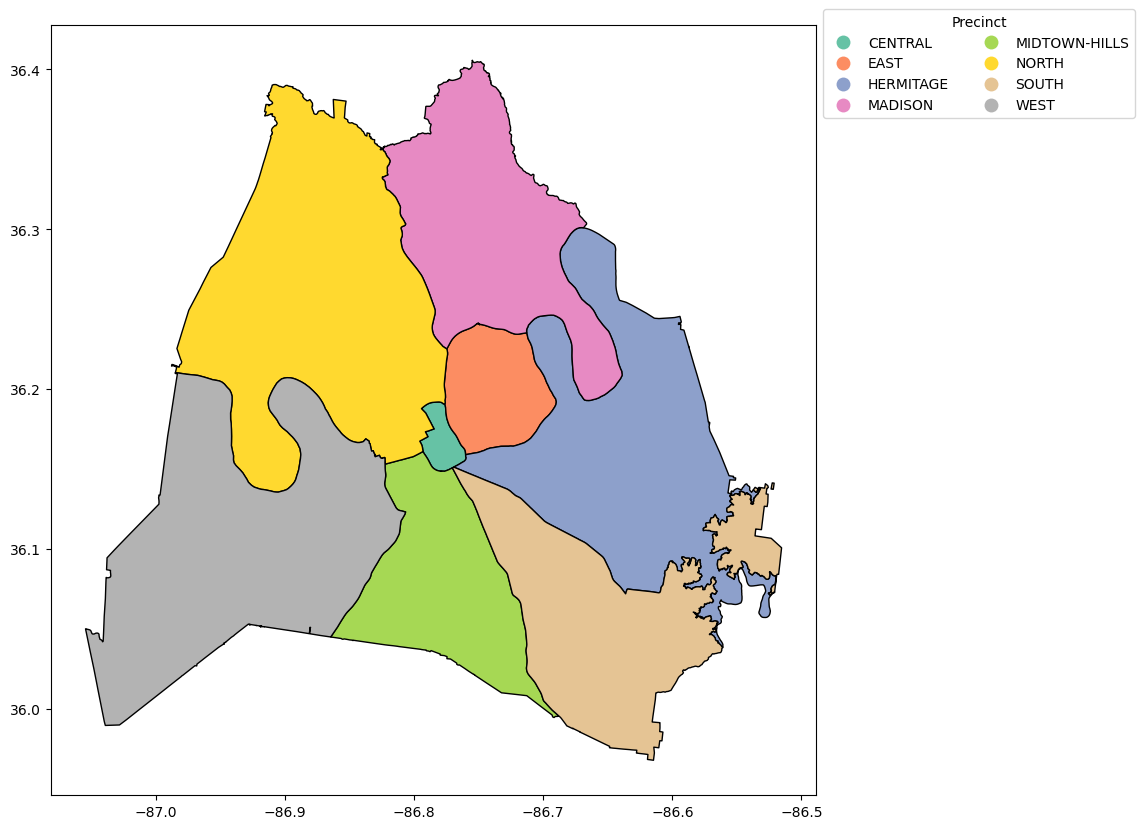

In [26]:
leg_kwds={'title': 'Precinct', 'loc': 'upper left',
         'bbox_to_anchor': (1, 1.03), 'ncol': 2}

police_outlines.plot(column= 'precinct', figsize =(10,10), 
                      edgecolor= 'black', 
                      legend= True, legend_kwds = leg_kwds,
                      cmap= 'Set2')
plt.show()

In [5]:
police_incidents=pd.read_csv('../data/mnpdi.csv')
print(police_incidents.shape)
police_incidents.head(3)

(965292, 31)


,Primary Key,Incident Number,Report Type,Report Type Description,Incident Status Code,Incident Status Description,Investigation Status,Incident Occurred,Incident Reported,Incident Location,...,Weapon Description,Victim Number,Domestic Related,Victim Type,Victim Description,Victim Gender,Victim Race,Victim Ethnicity,Victim County Resident,Mapped Location
0,20190496213_11,20190496213,D,DISPATCHED,U,UNFOUNDED,Closed,07/01/2019 05:31:00 PM,07/01/2019 06:17:00 PM,2410 2410,...,NONE,1,True,I,INDIVIDUAL (18 AND OVER),M,W,Non-Hispanic,RESIDENT,POINT (-86.696 36.218)
1,20180290646_11,20180290646,D,DISPATCHED,A,CLEARED BY ARREST,Closed,03/31/2018 12:21:00 PM,03/31/2018 07:41:00 PM,5824 5824,...,NONE,1,False,B,BUSINESS,NaN,NaN,NaN,NaN,POINT (-86.713 36.042)
2,20200243837_11,20200243837,D,DISPATCHED,U,UNFOUNDED,Closed,04/06/2020 11:15:00 AM,04/06/2020 01:11:00 PM,3144 3144,...,NONE,1,False,G,GOVERNMENT,NaN,NaN,NaN,NaN,POINT (-86.759 36.232)


In [6]:
police_incidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 965292 entries, 0 to 965291
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Primary Key                  965292 non-null  object 
 1   Incident Number              965292 non-null  int64  
 2   Report Type                  965208 non-null  object 
 3   Report Type Description      901259 non-null  object 
 4   Incident Status Code         965270 non-null  object 
 5   Incident Status Description  965260 non-null  object 
 6   Investigation Status         965292 non-null  object 
 7   Incident Occurred            965292 non-null  object 
 8   Incident Reported            965292 non-null  object 
 9   Incident Location            959977 non-null  object 
 10  Latitude                     946182 non-null  float64
 11  Longitude                    946182 non-null  float64
 12  ZIP Code                     515409 non-null  float64
 13 